In [1]:
from __future__ import print_function
import os
import pandas as pd
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

/home/akinyalcinkaya/anaconda2/envs/tensorlow/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
air_miles=pd.read_csv('DataFiles/us-airlines-monthly-aircraft-miles-flown.csv')

In [3]:
air_miles

,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
0,1963-01,6827.0
1,1963-02,6178.0
2,1963-03,7084.0
3,1963-04,8162.0
4,1963-05,8462.0
5,1963-06,9644.0
6,1963-07,10466.0
7,1963-08,10748.0
8,1963-09,9963.0
9,1963-10,8194.0


In [4]:
air_miles.index=air_miles.Month

In [5]:
print('Shape of the DataFrame',air_miles.shape)

Shape of the DataFrame (97, 2)


In [6]:
air_miles.head(10)

,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0
1963-06,1963-06,9644.0
1963-07,1963-07,10466.0
1963-08,1963-08,10748.0
1963-09,1963-09,9963.0


In [9]:
#2 columun ismini değiştiriyoruz burada...
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'},
                 inplace=True
                )

In [11]:
#konrol ediyoruz missing değerlere ve siliyoruz..
missing=pd.isnull(air_miles['Air miles flown'])
print('Number of missing value found:',missing.sum())
air_miles=air_miles.loc[~missing,:]

Number of missing value found: 1


Text(0.5,1,u'Monthly air miles flown during 1936-1970')

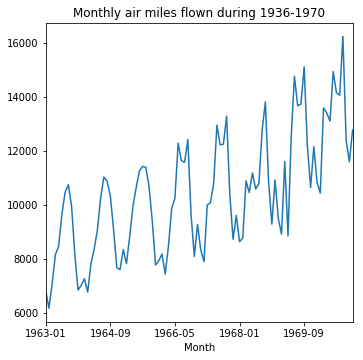

In [13]:
#air miles flown zaman serisi grafiği
fig=plt.figure(figsize=(5.5,5.5))
ax=fig.add_subplot(1,1,1)
air_miles['Air miles flown'].plot(ax=ax)
ax.set_title('Monthly air miles flown during 1936-1970')


In [14]:
adf_result=stattools.adfuller(air_miles['Air miles flown'],autolag='AIC')

In [15]:
print("p-val değeri ADF'nin testi air miles flown'da:",adf_result[1])

p-val değeri ADF'nin testi air miles flown'da: 0.994502281123
